In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import  make_blobs
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.activations import sigmoid, softmax

In [3]:
#we first create the function softmax with the help of numpy
def my_softmax(z):
  a = np.zeros_like(z)
  for z_i in range(z):
    a[z_i] = np.exp(z_i)/np.sum(np.exp(z))
  return a



In [4]:
#now we will use the softmax of the tensorflow which
#data set
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
X_train, y_train = make_blobs(n_samples=2000, centers=centers, cluster_std=1.0,random_state=30)

In [5]:
X_train.shape


(2000, 2)

In [6]:
y_train.shape

(2000,)

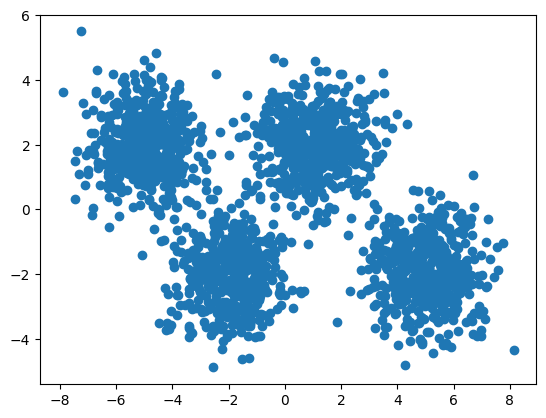

In [7]:
plt.scatter(X_train[:,0],X_train[:,1] )

In [8]:
#now after seeing the data lets make our model comprises of  three layers
model = Sequential([
    Input(shape = (2,)),
    Dense(units = 25, activation = "relu", name = "L1"),
    Dense(units = 15, activation = "relu", name = "L2"),
    Dense(units = 4,activation = "softmax", name = "L3")

])
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy()

)
model.fit(
    X_train,y_train,
    epochs = 20
)

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.7409
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6628
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2572
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0978
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0667
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0518
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0483
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0560
Epoch 9/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0382
Epoch 10/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0422
Epoch 11/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0277
Epoch 12/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0338
Epoch 13/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0379
Epoch 14/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0297
Epoch 15/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0279
Epoch 16/20
63/63 ━

In [9]:
#we have trained our model and as we can see with the increase of the training cycle
#loss decreases . now we will try to predict
prediction = model.predict(X_train)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [10]:
prediction[:2]

array([[3.2193308e-05, 6.9741474e-04, 9.9796307e-01, 1.3072268e-03],
       [9.9940789e-01, 5.9086201e-04, 1.2712632e-06, 1.8962814e-16]],
      dtype=float32)

In [11]:
#now lets see the class for first two examples
for i in range(2):
    y_predict = np.argmax(prediction[i])
    print(y_predict)



2
0


In [15]:
#we can do the more optimal way the prediction using the linear activation
#which uses the computation in better way and is faster

my_model2 = Sequential(
    [
        Input(shape = (2,)),
        Dense(units = 25, activation = "relu", name = "L1"),
        Dense( units = 15, activation = "relu", name = "L2"),
        Dense( units = 4, activation = "linear", name = "L3")
    ]
)
my_model2.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),

)


In [16]:
my_model2.fit(X_train,y_train,epochs = 20)

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4261
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0357
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0342
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0255
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0150
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0144
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0169
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0179
Epoch 9/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0244
Epoch 10/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0188
Epoch 11/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0130
Epoch 12/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0208
Epoch 13/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0152
Epoch 14/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0153
Epoch 15/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0131
Epoch 16/20
63/63 ━

In [17]:
prediction = my_model2.predict(X_train)
prediction[:2]

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


array([[-7.519706 , -3.5900645,  8.287511 , -4.9684324],
       [ 8.021617 , -3.932455 , -6.6839347, -6.8442807]], dtype=float32)

In [19]:
#these prediction as can we seen are negative and positive real numbers
#it is beacuse of using the linear activation which calculates the "z"
#if we want to convert this output into probabilities as with softmax
#we can do so with the help of softmax
prediction = tf.nn.softmax(prediction).numpy()

In [20]:
prediction.shape

(2000, 4)

In [24]:
prediction[:2]

array([[1.3646121e-07, 6.9443390e-06, 9.9999112e-01, 1.7498994e-06],
       [9.9999279e-01, 6.4329383e-06, 4.1063612e-07, 3.4979965e-07]],
      dtype=float32)

In [25]:
#as before we can find out the corresponding classs of prediction
for i in range(2):
  y_predict = np.argmax(prediction[i])
  print(f"prediction for example {i} is {y_predict}")



prediction for example 0 is 2
prediction for example 1 is 0


In [31]:
y_predict = tf.nn.softmax(prediction).numpy()

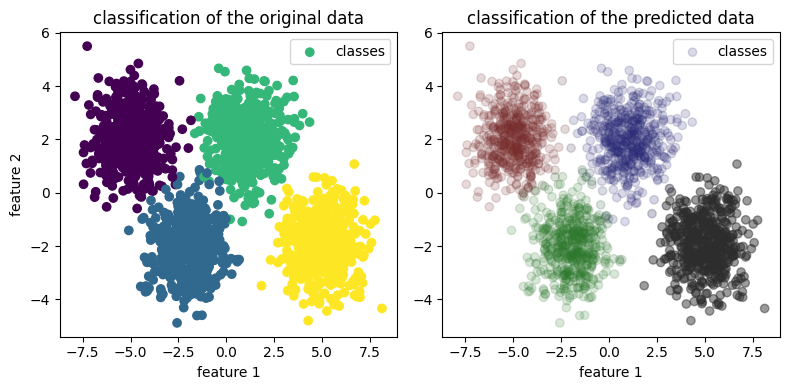

In [36]:
#now lets try to see the clustering
fig,axe = plt.subplots(1, 2, figsize = (8,4))
axe[0].scatter(X_train[:,0],X_train[:,1],c = y_train, label = "classes")
axe[0].set_xlabel("feature 1")
axe[0].set_ylabel("feature 2")
axe[0].legend()
axe[0].set_title("classification of the original data")


axe[1].scatter(X_train[:,0],X_train[:,1],c = y_predict, label = "classes")
axe[1].set_xlabel("feature 1")

axe[1].legend()
axe[1].set_title("classification of the predicted data")

plt.tight_layout()
plt.show()